### 하이퍼파라미터 튜닝
- 학습 모델을 훈련 중인 경우, 각 데이터 세트와 모델에는 일종의 변수인 다양한 하이퍼파라미터 세트가 필요합니다. 
- 이를 결정하는 유일한 방법은 여러 실험을 통해 하이퍼파라미터 세트를 선택하고 모델을 통해 실행하는 것
- 여기서 설정할 수 있는 값은 의사 결정 트리의 분기 수 (max_depth) 뿐이다

In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1.0 if grade > 5 else 0.0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1) # feature
y = wine['taste'] # label

### GridSearchCV
- 하이퍼파라미터 목록과 성능 지표를 지정하면 알고리즘이 가능한 모든 조합을 통해 작동하여 가장 적합한 것을 결정
- estimator : 사용할 모델
- param_grid : 테스트 할 파라미터 집합, 딕셔너리 형태 ( key에 파라미터 이름, value에 값 ), 설정할(정의된) 하이퍼파라미터
- scroring : None이 default, 성능 평가를 어떤 기준으로 할 것인지? 사용하는 모델, 목표에 따라 다른 scoring method를 사용하면 됨. 
- accuracy,roc_auc_score,average_precision 등을 사용할 수 있고 일반적으로 skitlearn에서 제공하는 accuracy를 사용하지만 별도의 함수도 직접 지정할 수 있다.
- n_jobs : 학습 시 사용할 CPU의 코어 개수, -1은 CPU의 코어 전부 사용
- refit : True가 default, estimator를 best 하이퍼파라미터로 재학습 시킬것인지?
- cv : None이 default, cross validation(교차검증)을 위해 분할되는 fold 수(데이터를 나눈 수)
- verbose : 0가 default, 큰 수를 입력할수록 print되는 내용이 더 많아짐
- return_train_score : False면 cv_results_가 training score 값을 갖고 있지 않음

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]} # 수정할 하이퍼파라미터 지정
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv = 5)
gridsearch.fit(X, y)


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

### GridSearchCV 결과 확인 : pprint
- pprint.PrettyPrinter(indent = )
- indent = : 각 수준의 들여쓰기 칸 수
- gridsearch.cv_results_
- .cv_results_ : gridsearch cv에 fit 시킨 결과 출력

In [6]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00564213, 0.01549091, 0.02217908, 0.03295994]),
    'mean_score_time': array([0.00360937, 0.00054026, 0.00340166, 0.00039997]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4]),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
    'std

### 최고의 성능을 가진 모델 
- 가장 좋은 성능 모델 : .best_estimator_
- 가장 좋은 점수 : .best_score_
- 가장 좋은 하이퍼파라미터 : .best_params_

In [10]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [11]:
gridsearch.best_score_

0.6888004974240539

In [12]:
gridsearch.best_params_

{'max_depth': 2}

### pipeline에 GridSearch 적용 : estimator=pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [
    ('scalar', StandardScaler()),
    ('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)

In [22]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}] 
# 딕셔너리 형태 {'스탭이름' + _ _(언더바 2개) + 하이퍼파라미터(=속성) : 설정)}

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv = 5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

In [15]:
GridSearch.best_estimator_

Pipeline(steps=[('scalar', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2))])

In [16]:
GridSearch.best_score_

0.6888004974240539

In [18]:
GridSearch.best_params_

{'clf__max_depth': 2}

In [17]:
GridSearch.cv_results_

{'mean_fit_time': array([0.0097261 , 0.0144012 , 0.02103286, 0.03860917]),
 'std_fit_time': array([0.00672373, 0.00640203, 0.00654636, 0.0068993 ]),
 'mean_score_time': array([0.00235548, 0.00040407, 0.00562816, 0.00104795]),
 'std_score_time': array([0.00171832, 0.0004949 , 0.00694165, 0.0008682 ]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.51076923, 0.51307692]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60769231, 0.61153846]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.6812933 , 0.67513472]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.7382602 , 0.71285604]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73441109, 0.72517321]),
 'mean_test_score': array([0.688

[Text(0.5, 0.8333333333333334, 'alcohol <= -0.315\ngini = 0.465\nsamples = 6497\nvalue = [2384, 4113]'),
 Text(0.25, 0.5, 'volatile acidity <= -0.621\ngini = 0.493\nsamples = 2996\nvalue = [1672, 1324]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.411\nsamples = 750\nvalue = [217, 533]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.456\nsamples = 2246\nvalue = [1455, 791]'),
 Text(0.75, 0.5, 'alcohol <= 0.866\ngini = 0.324\nsamples = 3501\nvalue = [712, 2789]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.402\nsamples = 2210\nvalue = [617, 1593]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.136\nsamples = 1291\nvalue = [95, 1196]')]

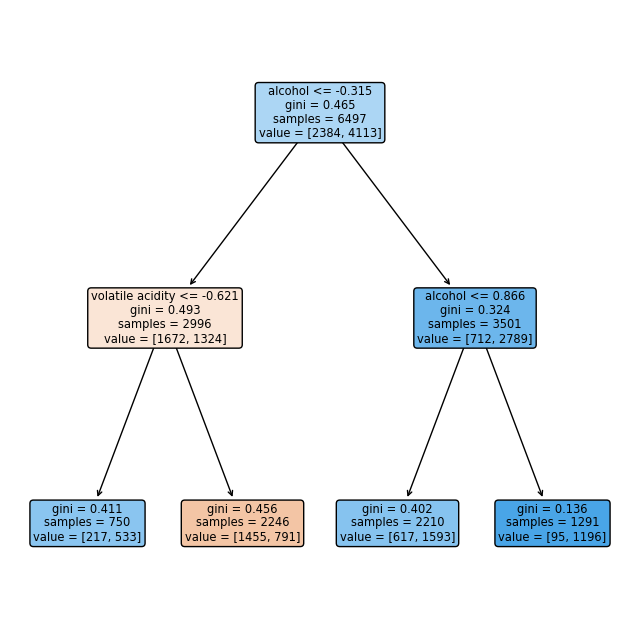

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 8))
feature_names_list= X.columns.tolist()
plot_tree(GridSearch.best_estimator_['clf'], 
          feature_names=feature_names_list,
               rounded=True, filled=True)

In [26]:
import pandas as pd

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.654023,0.086000
3,{'clf__max_depth': 10},4,0.644325,0.083817
